In [2]:
from numpy import *
import matplotlib.pyplot as plt
import time

In [3]:
#读取文本中的数据集
def loadDataSet(filename):
    dataSet = []
    file = open(filename)
    for line in file.readlines():
        if line.strip()=="":
            continue
        curline = line.strip().split("\t")
        fitline = list(map(float,curline))
        print(fitline)
        dataSet.append(fitline)
        #dataSet.append([float(curline[0]),float(curline[1])])
    return dataSet


dataSet = mat(loadDataSet("test.txt"))
print(dataSet)

[1.658985, 4.285136]
[-3.453687, 3.424321]
[4.838138, -1.151539]
[-5.379713, -3.362104]
[0.972564, 2.924086]
[-3.567919, 1.531611]
[0.450614, -3.302219]
[-3.487105, -1.724432]
[2.668759, 1.594842]
[-3.156485, 3.191137]
[3.165506, -3.999838]
[-2.786837, -3.099354]
[4.208187, 2.984927]
[-2.123337, 2.943366]
[0.704199, -0.479481]
[-0.39237, -3.963704]
[2.831667, 1.574018]
[-0.790153, 3.343144]
[2.943496, -3.357075]
[-3.195883, -2.283926]
[2.336445, 2.875106]
[-1.786345, 2.554248]
[2.190101, -1.90602]
[-3.403367, -2.778288]
[1.778124, 3.880832]
[-1.688346, 2.230267]
[2.592976, -2.054368]
[-4.007257, -3.207066]
[2.257734, 3.387564]
[-2.679011, 0.785119]
[0.939512, -4.023563]
[-3.674424, -2.261084]
[2.046259, 2.735279]
[-3.18947, 1.780269]
[4.372646, -0.822248]
[-2.579316, -3.497576]
[1.889034, 5.1904]
[-0.798747, 2.185588]
[2.83652, -2.658556]
[-3.837877, -3.253815]
[2.096701, 3.886007]
[-2.709034, 2.923887]
[3.367037, -3.184789]
[-2.121479, -4.232586]
[2.329546, 3.179764]
[-3.284816, 3.273

In [5]:
#计算欧氏距离
def euclDistance(varA,varB):
    return sqrt(sum(power(varA-varB,2)))

#初始化质心的位置
def initCentroids(dataSet,k):
    numSample , dim = dataSet.shape
    centroids = mat(zeros((k,dim)))# 每个质心有n个坐标值，总共要k个质心
    for j in range(dim):
        minj = min(dataSet[:,j])
        maxj = max(dataSet[:,j])
        ran = (float)(maxj-minj)
        centroids[:,j] = minj + ran*random.rand(k,1)
    return centroids

print(initCentroids(dataSet,4))

[[-0.28369532 -0.64450021]
 [-3.85632036 -3.41433763]
 [ 2.2963909   1.71694791]
 [ 3.21486163 -2.84680653]]


In [28]:
#keams 聚类函数
def keams(dataSet,k):
    numSample = dataSet.shape[0]
    clusterAssment = mat(zeros((numSample, 2)))
    clusterChange = True
    #第一步——创建质心
    centroids = initCentroids(dataSet,k)
    #print("dataSet:",dataSet)
    while clusterChange:
        clusterChange = False
        for i in range(numSample):
            minindex = -1
            minDist = 100000
            #第二步——计算各点到质心的距离，取最小值作为质心的邻居类
            for j in range(k):
                distence = euclDistance(centroids[j,:],dataSet[i,:])
                if distence < minDist:
                    minindex = j
                    minDist = distence
            #第三步——更新簇
            if clusterAssment[i,0] != minindex :
                clusterChange = True
                clusterAssment[i,:] = minindex , minDist **2  #并将第i个数据点的分配情况存入字典
        #print("cluster:",clusterAssment)
        #第四步——重新计算质心位置
        for m in range(k):
            pointCluster = dataSet[nonzero(clusterAssment[:,0].A==m)[0]] # 去第一列等于m的所有列
            #print("A:",nonzero(clusterAssment[:,0].A==m)[0])
            #print("point:",pointCluster)
            centroids[m,:] = mean(pointCluster,axis=0)
    
    print('Congratulations, cluster complete!')
    return centroids,clusterAssment
            
keams(dataSet,4)

Congratulations, cluster complete!


(matrix([[-3.53973889, -2.89384326],
         [-2.46154315,  2.78737555],
         [ 2.65077367, -2.79019029],
         [ 2.6265299 ,  3.10868015]]), matrix([[ 3.        ,  4.01649701],
         [ 1.        ,  5.23220486],
         [ 2.        ,  9.14408279],
         [ 0.        ,  0.        ],
         [ 3.        ,  3.79606988],
         [ 1.        , 14.30469862],
         [ 2.        ,  6.12823991],
         [ 0.        ,  0.        ],
         [ 3.        , 17.59766687],
         [ 1.        ,  4.89326086],
         [ 2.        ,  1.39091249],
         [ 0.        ,  0.        ],
         [ 3.        , 32.23250996],
         [ 1.        ,  3.57485702],
         [ 2.        , 10.343233  ],
         [ 2.        ,  9.57812069],
         [ 3.        , 17.31604211],
         [ 1.        ,  2.65451491],
         [ 2.        ,  1.30200696],
         [ 0.        ,  0.        ],
         [ 3.        ,  7.37923389],
         [ 1.        ,  4.89756676],
         [ 2.        ,  2.19103789],


Congratulations, cluster complete!


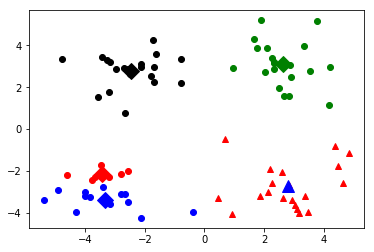

In [32]:
def show(dataSet,k,centroids,clusterAssment):
    numSample,dim = dataSet.shape
    if dim!=2:
        print("i'm sorry that there can't not draw more then two dim")
        return 0
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("the value of k is bigger than limited")
        return 0
    for i in range(numSample):
        markint = int(clusterAssment[i,0])
        plt.plot(dataSet[i,0],dataSet[i,1],mark[markint])
        
    cenmark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']

    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], cenmark[i], markersize = 12)
    plt.show()
    
    
        
centroids,clusterAssment = keams(dataSet,5)
show(dataSet,5,centroids,clusterAssment)